# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    (optimize for number of days)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
periods = range(2, 16)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].stats()

2 3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,2.42,5.05,4.78,4.54,3.61,7.21,8.04,5.30,1.26,-0.34,0.54,0.41,-1.06,0.95
max_closed_out_drawdown,-35.27,-35.78,-26.82,-24.61,-24.68,-20.59,-28.35,-45.01,-50.21,-48.06,-48.23,-46.35,-60.35,-58.86
drawdown_annualized_return,-14.60,-7.09,-5.61,-5.42,-6.84,-2.85,-3.53,-8.50,-39.83,140.36,-88.68,-114.03,56.71,-61.77
drawdown_recovery,-2.69,-2.86,-2.72,-0.90,-1.48,-1.48,-3.78,-3.85,-3.54,-3.52,-3.52,-3.52,-3.52,-3.52
best_month,22.44,31.87,23.72,25.66,25.65,21.97,21.98,21.98,21.97,21.98,21.97,22.56,22.36,22.30
worst_month,-14.28,-20.05,-17.68,-17.71,-17.68,-17.70,-17.71,-24.36,-24.37,-24.36,-24.36,-24.37,-24.38,-24.34
sharpe_ratio,0.22,0.36,0.35,0.33,0.29,0.50,0.54,0.38,0.16,0.07,0.12,0.11,0.03,0.14
sortino_ratio,0.16,0.27,0.26,0.25,0.20,0.35,0.38,0.27,0.12,0.05,0.09,0.09,0.03,0.12
monthly_std,4.69,5.09,4.52,4.25,3.99,3.76,3.95,4.11,4.37,4.27,4.23,4.13,4.36,4.44
pct_time_in_market,22.37,22.62,23.27,22.24,20.59,20.40,19.95,21.24,23.75,23.33,23.98,23.04,25.68,25.88


Bar graphs

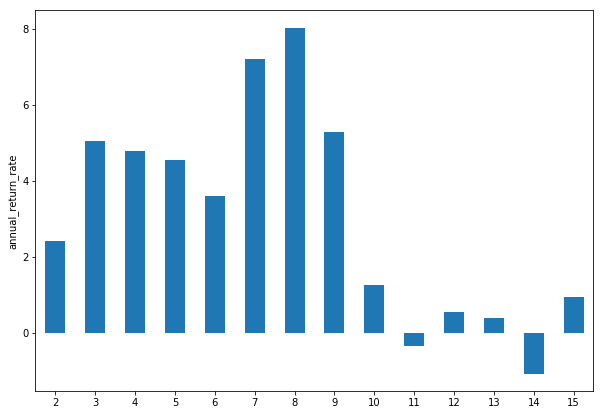

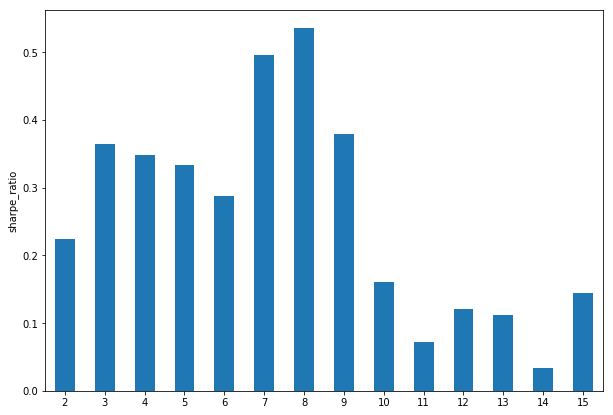

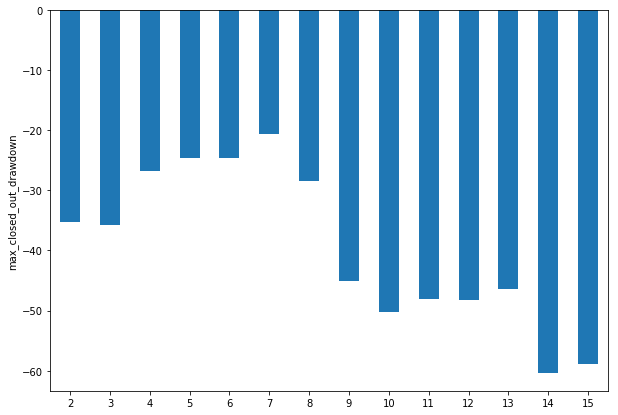

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

2007-03-08 00:00:00 BUY  260 GDX @ 38.35
2019-07-03 00:00:00 SELL 260 GDX @ 25.65


Equity curve

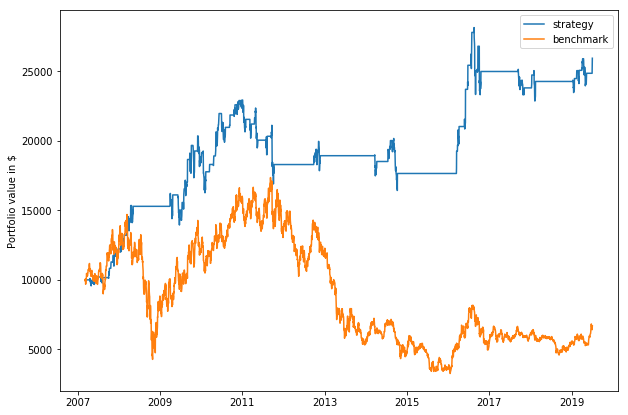

In [9]:
pf.plot_equity_curve(strategies['8'].dbal, benchmark=benchmark.dbal)